In [ ]:
import pandas as pd
import seaborn as sb
import joblib
import matplotlib.pyplot as plt
import truvari

In [2]:
blue = joblib.load("blue.jl")
green = joblib.load("green.jl")
control = joblib.load("control.jl")

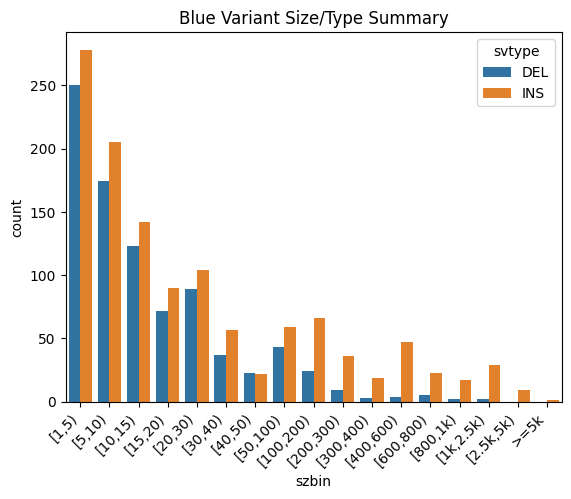

In [14]:
view = blue.groupby(['szbin', 'svtype']).size().reset_index()
view.columns = ['szbin', 'svtype', 'count']
p = sb.barplot(data=view[view['svtype'] != 'SNP'], 
           x="szbin", 
           hue="svtype", 
           y="count", 
           hue_order=["DEL", "INS"], 
           order=truvari.SZBINS[1:])
p.set(title="Blue Variant Size/Type Summary")
hide = plt.xticks(rotation=45, ha='right')

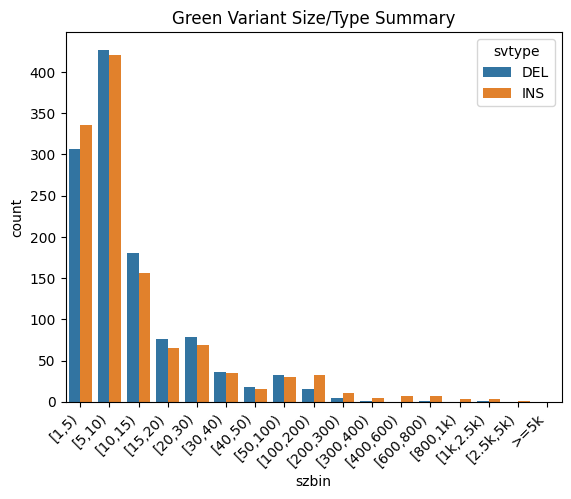

In [15]:
view = green.groupby(['szbin', 'svtype']).size().reset_index()
view.columns = ['szbin', 'svtype', 'count']
p = sb.barplot(data=view[view['svtype'] != 'SNP'], 
           x="szbin", 
           hue="svtype", 
           y="count", 
           hue_order=["DEL", "INS"], 
           order=truvari.SZBINS[1:])
p.set(title="Green Variant Size/Type Summary")
hide = plt.xticks(rotation=45, ha='right')

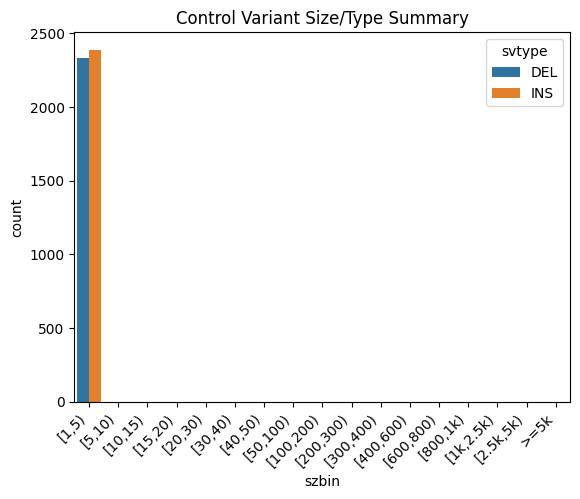

In [16]:
view = control.groupby(['szbin', 'svtype']).size().reset_index()
view.columns = ['szbin', 'svtype', 'count']
p = sb.barplot(data=view[view['svtype'] != 'SNP'], 
           x="szbin", 
           hue="svtype", 
           y="count", 
           hue_order=["DEL", "INS"], 
           order=truvari.SZBINS[1:])
p.set(title="Control Variant Size/Type Summary")
hide = plt.xticks(rotation=45, ha='right')

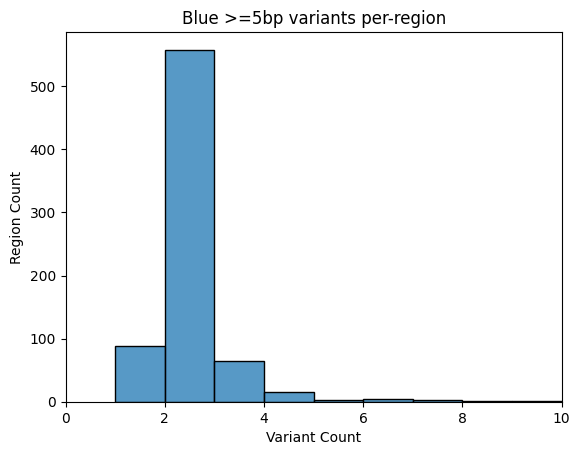

In [32]:
blue_vpr = pd.read_csv("temp/blue_counts.bed", sep='\t', names=["chrom", "start", "end", "anno", "count"])
p = sb.histplot(data=blue_vpr, x="count", binwidth=1)
hide = p.set(title="Blue >=5bp variants per-region", ylabel="Region Count", xlabel="Variant Count", xlim=(0,10))

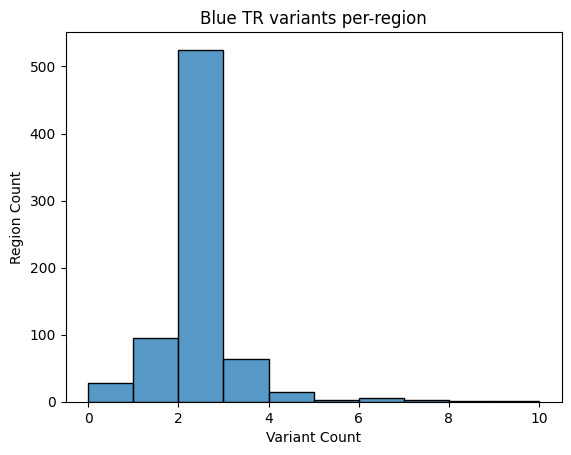

In [29]:
blue_vpr = pd.read_csv("temp/blue_pass_counts.bed", sep='\t', names=["chrom", "start", "end", "anno", "count"])
p = sb.histplot(data=blue_vpr, x="count", binwidth=1)
hide = p.set(title="Blue TR variants per-region", ylabel="Region Count", xlabel="Variant Count")

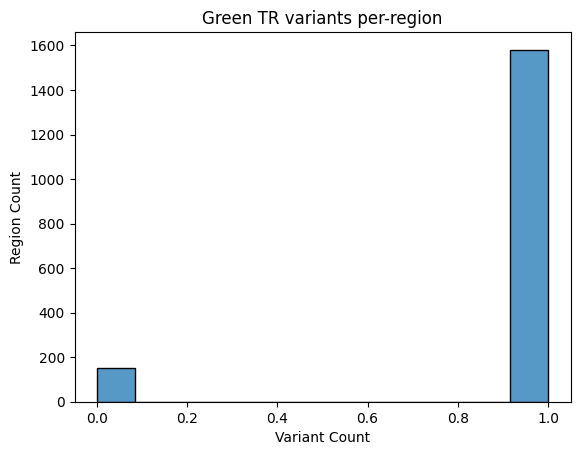

In [28]:
green_vpr = pd.read_csv("temp/green_pass_counts.bed", sep='\t', names=["chrom", "start", "end", "anno", "count"])
p = sb.histplot(data=green_vpr, x="count")
hide = p.set(title="Green TR variants per-region", ylabel="Region Count", xlabel="Variant Count")

In [30]:
green_vpr['count'].value_counts()

1    1581
0     150
Name: count, dtype: int64